## Лабораторная работа 5
## Решение интегральных уравнений Фредгольма
Выполнил: Гапанович А. В. (4 группа)\
Вариант : 1

Для решения дано следующее уравнение:
$$x(t) + \int_{1}^{2}{\left(\frac{t}{S^{2}}-1 \right)}x(s)ds=t^{2}+\frac{t}{6}-\frac{7}{3}$$




Цель: найти его приближенное решение квадратурным методом с тремя и 10 узлами, пользуясь:
*   формулой трапеций
*   формулой Гаусса

In [1]:
import matplotlib.pyplot as plt
from typing import Callable
import numpy as np
import math

In [309]:
max = 2
min = 1

tmp_t = 0.5
tmp_j = 1

g_tmp_j = 5. / 9
g_tmp_t = 8. / 9

w = [-0.9739065285,-0.8650633666,-0.6794095682,-0.4333953941,-0.1488743389,
     +0.1488743389,+0.4333953941,+0.6794095682,+0.8650633666,+0.9739065285]
c = [0.0666713443,0.1494513491,0.2190863625,0.2692667193,0.2955242247,
     0.2955242247,0.2692667193,0.2190863625,0.1494513491,0.0666713443]

def fun_(t, s):
    return t / s**2 - 1

def fun(t):
    return t**2 + t/6 - 7/3

def fun_analytical():
    n_t = 60
    tau = int((max-min)/n_t)
    t = np.linspace(min, max, n_t)
    u = np.zeros((n_t, 1))
    for i in range(n_t):
        u[i] = 1/3*(-5+3*t[i]**2)-13/20
    return u, t

# 1. Метод трапеций
$$\int^b_a f(x)dx = h\left(\frac{f_0 + f_n}{2}+\sum^{n-1}_{i = 1}f_i\right) $$

In [310]:
def trapezium_method_3(fun_, fun, max, min):
    x = np.linspace(min, max, 3)
    size = len(x)
    h = (max - min) / 2
    matrix = np.zeros((size, size)) 
    matrix_ = np.zeros((size, 1))
    for i in range(0, size):
        matrix[i][0] = -h * tmp_t * fun_(x[i], x[1])
        for j in range(2, size - 1):
            matrix[i][j] = -h * tmp_j * fun_(x[i], x[j])
        matrix[i][size - 1] = -h * tmp_t * fun_(x[i], x[size - 1])
        matrix[i][i] += 1
    for j in range(0, size):
        matrix_[j][0] = fun(x[j])
    return np.linalg.solve(matrix, matrix_), x

In [311]:
def trapezium_method_10(fun_, fun, max, min):
    x = np.linspace(min, max, 10)
    size = len(x)
    h = (max - min) / 9 
    matrix = np.zeros((size, size)) 
    matrix_ = np.zeros((size, 1))
    for i in range(0, size):
        matrix[i][0] = -h * tmp_t * fun_(x[i], x[1])
        for j in range(2, size - 1):
            matrix[i][j] = -h * tmp_j * fun_(x[i], x[j])
        matrix[i][size - 1] = -h * tmp_t * fun_(x[i], x[size - 1])
        matrix[i][i] += 1
    for j in range(0, size):
        matrix_[j][0] = fun(x[j])
    return np.linalg.solve(matrix, matrix_), x

In [312]:
def draw_trapezium_method():
    x_0, t_0 = fun_analytical()
    x_1, t_1 = trapezium_method_3(fun_, fun, max, min)
    x_2, t_2 = trapezium_method_10(fun_, fun, max, min)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Метод трапеций, 3 узла')
    plt.grid(True)
    plt.plot(x_1, t_1)
    plt.plot(x_0, t_0)
    fig_ax_2.legend( ('Численное', 'Аналитическое'))
    fig_ax_3 = fg.add_subplot(gs[1, 1])
    plt.title('Метод трапеций, 10 узлов')
    plt.grid(True)
    plt.plot(x_2, t_2)
    plt.plot(x_0, t_0)
    fig_ax_2.legend( ('Численное', 'Аналитическое'))

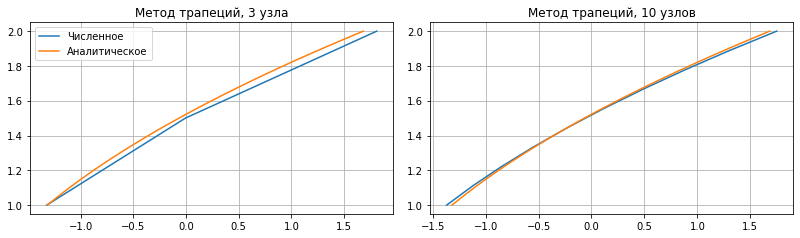

In [313]:
draw_trapezium_method()

# 2. Метод Гаусса
$$\int^b_a f(x)dx = \frac{b - a}{2}\sum^{n}_{i = 1}c_i f(s_i),s_i = \frac{a+b+(b-a)x_i}{2}$$

In [314]:
def Gauss_method_3(fun_, fun, max, min):
    rang = 3
    x = np.linspace(min, max, rang)
    x_t = [(min + max) / 2] * rang
    w = [- math.sqrt(3. / 5), 0, math.sqrt(3. / 5)]
    h = (max - min) / 2 
    for i in range(rang):
        x_t[i] += w[i] * h
    size = len(x_t)
    matrix = np.zeros((size, size))
    matrix_ = np.zeros((size, 1))
    for i in range(0, size):
        matrix[i][0] = -h * g_tmp_j * fun_(x_t[i], x_t[1])
        for j in range(2, size - 1):
            matrix[i][j] = -h * g_tmp_t * fun_(x_t[i], xt[j])     
    for i in range(0, size): 
        matrix[i][size - 1] = -h * g_tmp_j * fun_(x_t[i], x_t[size - 1])
        matrix[i][i] += 1
    for j in range(0, size):
        matrix_[j][0] = fun(x[j])
    return np.linalg.solve(matrix, matrix_), x

In [315]:
def Gauss_method_10(fun_, fun, max, min):
    x = np.linspace(min, max, 10)
    x_t = [(min + max) / 2] * 10 
    h = (max - min) / 9
    for i in range(10):
        x_t[i] += w[i] * (max - min) / 2  
    size = len(x_t)
    matrix = np.zeros((size, size))
    matrix_ = np.zeros((size, 1))
    for i in range(0, size):
        for j in range(0, size):
            matrix[i][j] = -(max - min) / 2 * c[j] * fun_(x_t[i], x_t[j])      
    for i in range(0, size):
        matrix[i][i] += 1
    for j in range(0, size):
        matrix_[j][0] = fun(x[j])    
    return np.linalg.solve(matrix, matrix_), x

In [316]:
def draw_Gauss_method():
    x_0, t_0 = fun_analytical()
    x_1, t_1 = Gauss_method_3(fun_, fun, max, min)
    x_2, t_2 = Gauss_method_10(fun_, fun, max, min)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Метод Гаусса, 3 узла')
    plt.grid(True)
    plt.plot(x_1, t_1)
    plt.plot(x_0, t_0)
    fig_ax_2.legend( ('Численное', 'Аналитическое'))
    fig_ax_3 = fg.add_subplot(gs[1, 1])
    plt.title('Метод Гаусса, 10 узлов')
    plt.grid(True)
    plt.plot(x_2, t_2)
    plt.plot(x_0, t_0)
    fig_ax_2.legend( ('Численное', 'Аналитическое'))

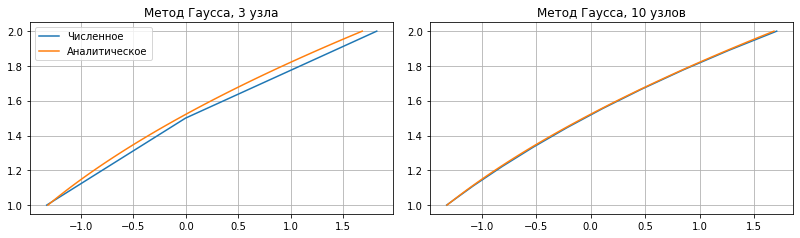

In [317]:
draw_Gauss_method()